In [1]:
import numpy as np
import pandas as pd


In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [4]:
df = pd.read_csv("Position_Salaries.csv")

In [5]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [7]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
X = df.iloc[:,1:-1].values

In [9]:
y = df.iloc[:,-1].values

In [10]:
print("Data Preview:")
print(df.head())

Data Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


Training the models

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

print("Model trained successfully")

Model trained successfully


Visualization

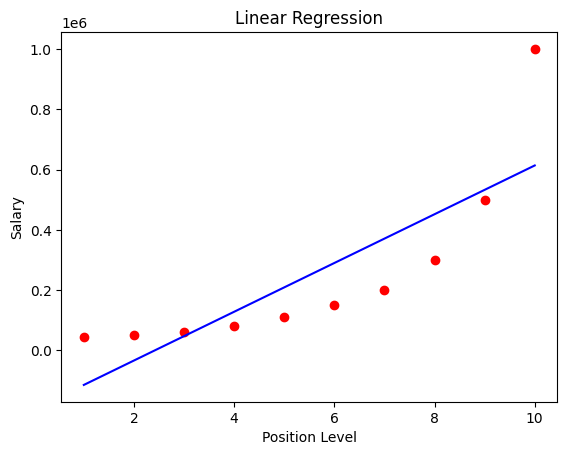

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg.predict(X),color = 'blue')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.title("Linear Regression")
plt.show()

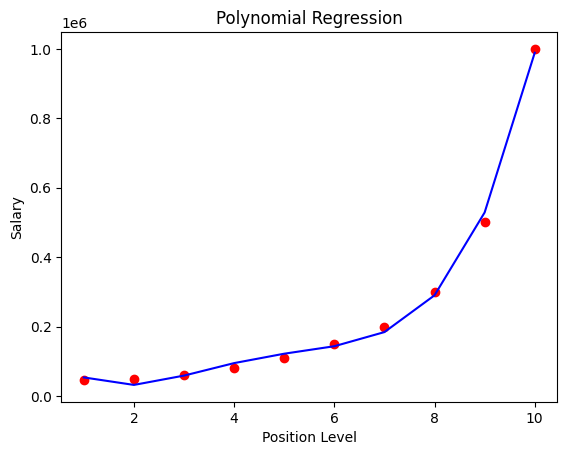

In [15]:
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color = 'blue')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression")
plt.show()

Prediction

In [18]:
lin_prediction = lin_reg.predict([[6.5]])
print("Linear Prediction:",lin_prediction)

Linear Prediction: [330378.78787879]


In [19]:
poly_prediction = lin_reg2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Prediction:",poly_prediction)

Polynomial Prediction: [158862.45265155]


Performance Metrics

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lin_mse = mean_squared_error(y,lin_reg.predict(X))
poly_mse = mean_squared_error(y,lin_reg2.predict(poly_reg.fit_transform(X)))

In [24]:
lin_mae = mean_squared_error(y,lin_reg.predict(X))
poly_mae = mean_squared_error(y,lin_reg2.predict(poly_reg.fit_transform(X)))

In [25]:
lin_rmse = np.sqrt(lin_mse)
poly_rmse = np.sqrt(poly_mse)

In [27]:
lin_r2 = r2_score(y,lin_reg.predict(X))
poly_r2 = r2_score(y,lin_reg2.predict(poly_reg.fit_transform(X)))

In [28]:
print("Performance Metrics")
print("Linear Regression:")
print("MSE:",lin_mse)
print("MAE:",lin_mae)
print("RMSE:",lin_rmse)
print("R2 Score:",lin_r2)

Performance Metrics
Linear Regression:
MSE: 26695878787.878784
MAE: 26695878787.878784
RMSE: 163388.73519272613
R2 Score: 0.6690412331929895


In [29]:
print("Polynomial Regression:")
print("MSE:",poly_mse)
print("MAE:",poly_mae)
print("RMSE:",poly_rmse)
print("R2 Score:",poly_r2)

Polynomial Regression:
MSE: 210343822.84381685
MAE: 210343822.84381685
RMSE: 14503.234909626777
R2 Score: 0.9973922891706614
